# Networks of the avant garde

In [82]:
from nltk.tag import StanfordNERTagger
from geopy.geocoders import Nominatim
import xml.etree.ElementTree as ET
from xml.dom.minidom import parse
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import gmplot as gm
import numpy as np
import nltk

model = 'stanford-ner/classifiers/english.all.3class.distsim.crf.ser.gz'
jar = 'stanford-ner/stanford-ner.jar'

ner = StanfordNERTagger(model,jar)

%matplotlib inline

In [2]:
prefix = raw_input("Enter the prefix: ")
yyyy = raw_input("Enter year (yyyy): ")      # Enter bmtnaap, 1921, 11, 01
mm = raw_input("Enter month (mm): ")
ii = raw_input("Enter issue #: ")

Enter the prefix: bmtnaap
Enter year (yyyy): 1921
Enter month (mm): 11
Enter issue #: 01


In [38]:
f = prefix + '_' + yyyy + '-' + mm + '_' + ii + '.tei.xml'
tree = ET.parse(f)
root = tree.getroot()

#### Printing the values for root

In [39]:
print root.tag
print root.attrib
print root.text

{http://www.tei-c.org/ns/1.0}TEI
{}

  


The values in this tree seem to be stored in a strange pattern. Every node name is appended to the text '{http://www.tei-c.org/ns/1.0}'. This can make the processing of this data difficult. Should we first deploy some preprocessing to this data?
    

In [40]:
pre = "{http://www.tei-c.org/ns/1.0}"  # This is the text with which each element name starts

## Document Structure

<img src="docstruct.png" width="400" align="left">

## Parsing the tree

From the above graph, it can be seen that the tree of the XML contains three main branches:  
  * TEIHeader  
  * Fascimile  
  * Text  
  
We are interested only in parsing and analysing the content in **text** section. Hence, we will re-assign the variable _**root**_ to **text** node.  
  
Hence, **root = text**

In [41]:
for child in root.iter(pre+'text'):   # Make 'text' node as the new 'root' node
    root = child
    

#### Creating a dictionary for text

In [42]:
textdict = {}  # Stores the text of the book

for child in root.iter(pre+'lb'):
    textdict[child.attrib['facs']] = child.tail

print textdict['P2_TL00001']  # Prints the title of the journal

BROOM


#### Storing the entire text in a list

In [43]:
text = []  # Stores the text of the book in the form of a list

for child in root.iter(pre+'lb'):
    text.append(child.tail)

### Printing the book

In [44]:
for element in text:
    print element

BROOM
An International Magazine of the Arts Published by Americans in Italy
	      
Editors, Harold A. Loeb, Alfred Kreymborg - Associate Editor, Giuseppe Prezzolini
NOVEMBER 1921.
vol. 1, No. I
The Editors of Broom will be pleased to consider mss. submitted to them, but all mss. must be
		
accompanied by a self-addressed stamped envelope.
		
Mss. from Europe should be sent to the Rome office; mss. from America to the New York office,
		
The Price of Broom is:
		
For America, fifty cents the copy, and five dollars for a year's subscription. For Italy, 10 lire
		
the copy, 100 lire for a year's subscription. For France, 6 francs the copy, 60 francs for a year's
		
subscription. For Great Britain, 2/6 for the copy, One pound and five shillings for a year's subscription.
		
The contents of this issue are protected by copyright, November 1921. Infringement of same will
	      
be prosecuted.
Headquarters, 18, Trinità dei Monti, Rome (6), Italy.
		
New York Office, Three East Ninth Street.


### Byline pass

In [45]:
artists = {} # A dictionary of artist names and their frequencies of occurences in the text

In [46]:
full = ""

for line in text:
    full += line

nert = pd.DataFrame(ner.tag(full.split()))

In [47]:
# for i in nert.iterrows():
#     i[1][0] = (i[1][0]).encode('utf-8')

In [48]:
nert[1].head(10)

0    ORGANIZATION
1    ORGANIZATION
2    ORGANIZATION
3               O
4               O
5               O
6               O
7               O
8               O
9               O
Name: 1, dtype: object

##### People mentioned

In [49]:
people = nert.ix[nert[1]=='PERSON']

people.head(5)

,0,1
12,Harold,PERSON
13,A.,PERSON
14,"Loeb,",PERSON
15,Alfred,PERSON
16,Kreymborg,PERSON


In [50]:
for row in people.iterrows():
    name = row[1][0]
    if name in artists:
        artists[name] +=1
    else:
        artists[name] = 1

art = pd.DataFrame.from_dict(artists.items())

art = art.sort_values([1], ascending=False)

art.head(10)   # Total 110 artists

,0,1
73,Bertram,63
14,Ronald,46
51,Nina,15
48,Fletcher,12
64,Herondale,11
58,Marnia,11
17,Terrence,11
84,Ellis,7
35,Malourisan,5
83,Einstein,4


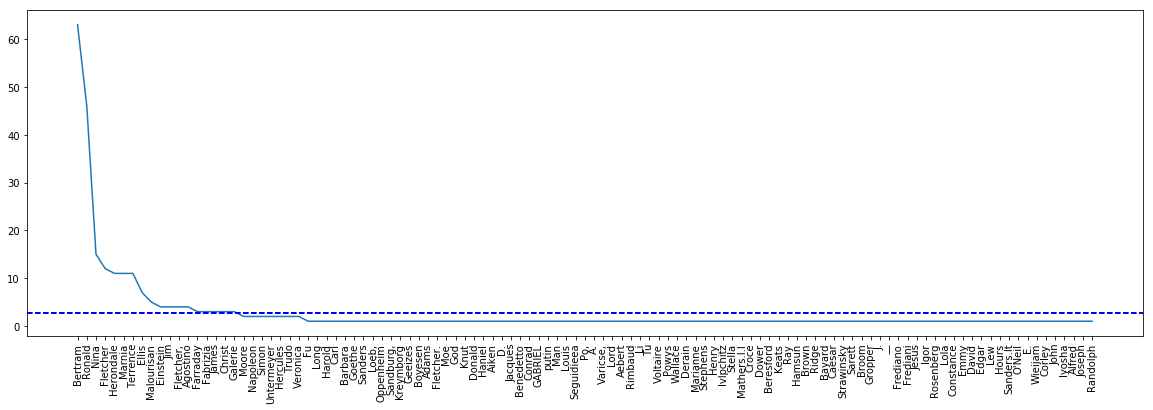

In [53]:
x = np.array([i for i in range(111)])
ticks = list(art[0])
plt.xticks(x, ticks, rotation=90)

fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 20
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size


plt.plot(x,art[1])
plt.axhline(art[1].mean(), color='b', linestyle='dashed', linewidth=2)


plt.draw()

The top 10 artists mentioned here are:  
  1. Bertram
  2. Ronald
  3. Nina
  4. Fletcher
  5. Herondale
  6. Marnia	
  7. Terrence
  8. Ellis	
  9. Malourisan	
  10. Einstein

##### Location

In [63]:
location = nert.ix[nert[1]=='LOCATION']

location.head(3)  # 87 entries

,0,1
10,Italy,LOCATION
51,Europe,LOCATION
57,Rome,LOCATION


##### Plotting these locations

In [83]:
# geolocator = Nominatim()

In [122]:
# for loc in location.iterrows():
#     print loc[1][0]

In [123]:
# coord = []

# for loc in location.iterrows():
#     if(isinstance(loc[1][0], str)):
#         print loc
#         l = geolocator.geocode(loc)
#         coord.append([l.latitude,l.longitude])
#     else:
#         continue


### Keys

P2_TL00001 = Journal Name  
P2_TL00002 = Volume  
P2_TL00003 = Month, Year  
P2_TL00004 =   
P2_TL00005 =   
P2_TL00006 =   
P2_TL00007 = Location  
P2_TL00008 =   
P2_TL00026 =   
P2_TL00027 =   
P2_TL00028 =   
P2_TL00029 =   
P2_TL00030 =  
P2_TL00031 =   
P93_TL00001 =   
P93_TL00002 =   
P93_TL00003 =   